In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/ML review/FINAL PROJECT/Problem1_Happiness_2020.csv")
df.head(10)

,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Europe,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717
6,Sweden,Europe,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880
7,New Zealand,Oceania,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139
8,Austria,Europe,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955
9,Luxembourg,Europe,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Country Name,0
Regional Indicator,0
Happiness Scores,0
Social Support,0
Healthy Life Expectancy,0
Freedom to Make Life Choices,0
Generosity,0
Perceptions of Corruption,0


In [ ]:
df.shape

(153, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  153 non-null    object 
 1   Regional Indicator            153 non-null    object 
 2   Happiness Scores              153 non-null    float64
 3   Social Support                153 non-null    float64
 4   Healthy Life Expectancy       153 non-null    float64
 5   Freedom to Make Life Choices  153 non-null    float64
 6   Generosity                    153 non-null    float64
 7   Perceptions of Corruption     153 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.7+ KB


In [ ]:
df.describe()

,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.473249,0.808636,64.445650,0.783413,-0.014719,0.733179
std,1.112094,0.121546,7.057819,0.117595,0.151764,0.175276
min,2.566900,0.320000,45.200000,0.396573,-0.300907,0.109784
25%,4.720000,0.740000,58.961712,0.714839,-0.127015,0.682620
50%,5.515000,0.830000,66.305145,0.799805,-0.033665,0.783122
75%,6.228500,0.906747,69.289192,0.877709,0.085429,0.850000
max,7.808700,0.974670,76.804581,0.974998,0.560664,0.935585


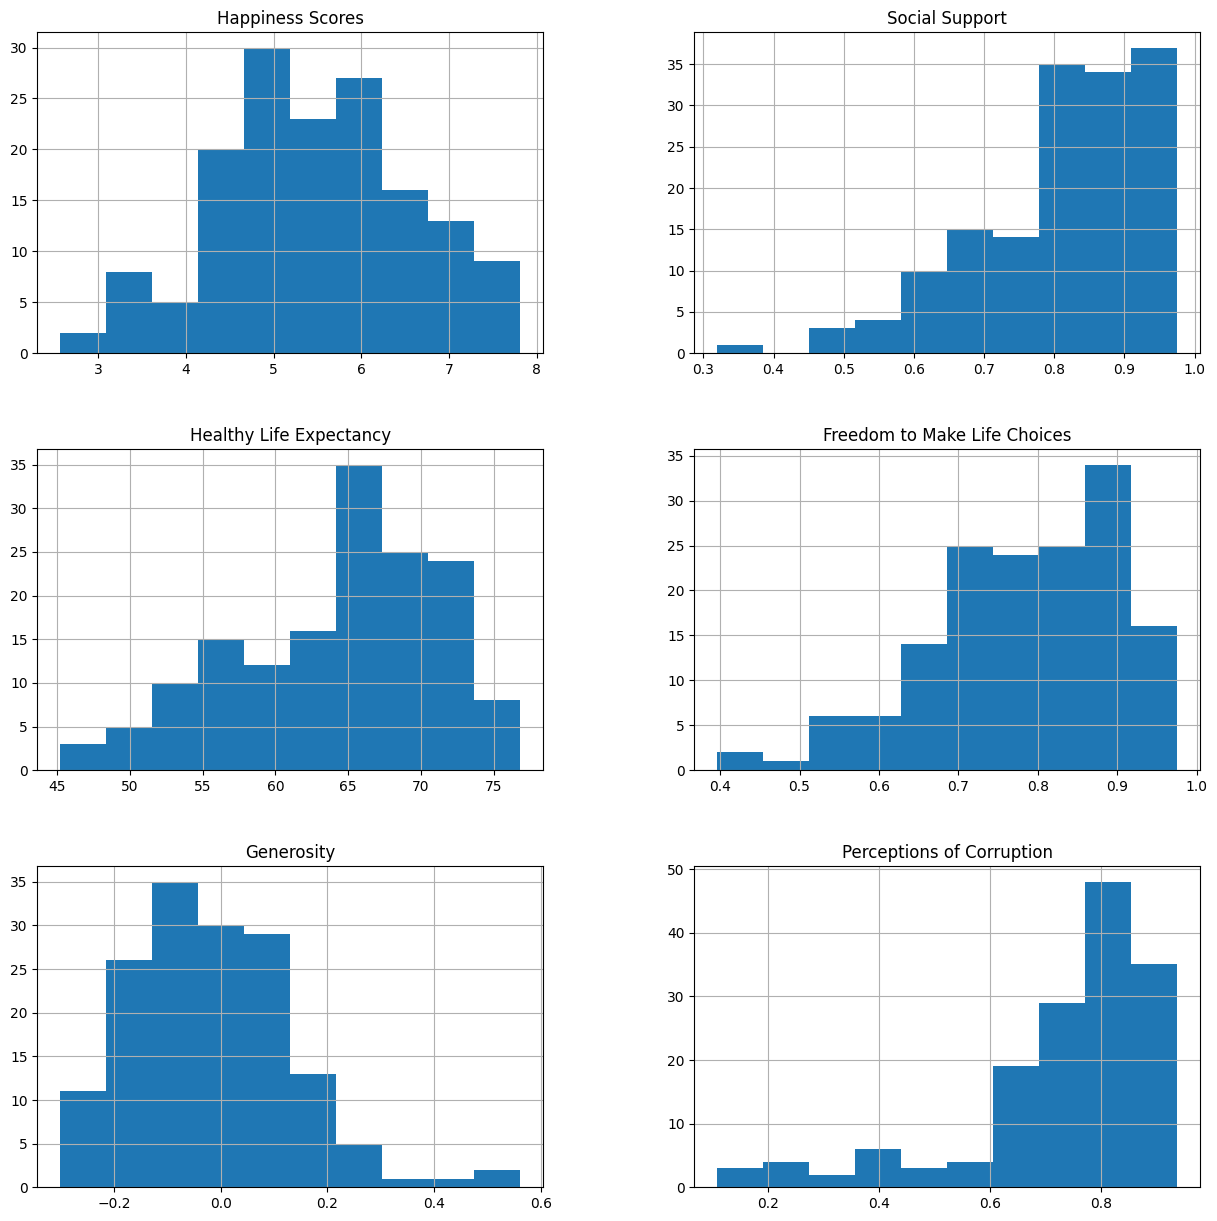

In [ ]:
df.hist(figsize = (15,15))
plt.show()

In [ ]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Country Name', 'Regional Indicator'], dtype='object')


In [ ]:
data_numeric = df.drop(columns=non_numeric_cols)

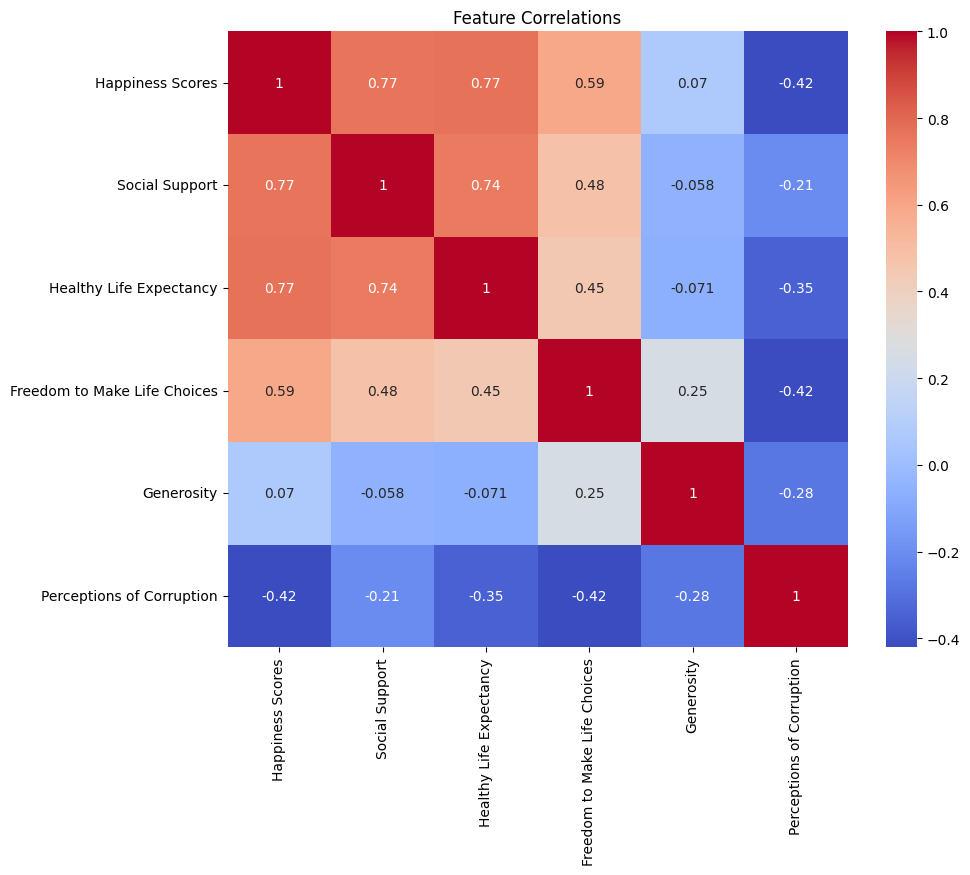

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
LE = LabelEncoder()
for col in non_numeric_cols:
  df[col] = LE.fit_transform(df[col])
print("After Encoding: ")
df.head()

After Encoding: 


,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,42,2,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,35,2,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,131,2,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,56,2,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,105,2,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218


In [ ]:
y = df['Happiness Scores']
X = df.drop(['Happiness Scores', 'Country Name'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)
print(f'Linear Regression MSE: {lr_mse}')
print(f'Linear Regression R2: {lr_r2}')

Linear Regression MSE: 0.37907068444633035
Linear Regression R2: 0.5276144365217177


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_preds = dtr.predict(X_test)
dtr_mse = mean_squared_error(y_test, dtr_preds)
dtr_r2 = r2_score(y_test, dtr_preds)
print(f'Decision Tree MSE: {dtr_mse}')
print(f'Decision Tree R2: {dtr_r2}')

Decision Tree MSE: 0.6227777709030801
Decision Tree R2: 0.2239145882264808


Linear Regression can be better choice in this case, as the mse of lr which is just 0.379 in comparision with that of dtr at 0.622, and the r2 of lr is also higher  than dtr at  0.52 and 0.22 respectively.


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['Regional Indicator', 'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Perceptions of Corruption'],
      dtype='object')


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train[selected_features], y_train)
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_params = {
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f'Random Forest MSE: {rf_mse}')
print(f'Random Forest R²: {rf_r2}')

Random Forest MSE: 0.2872565121758155
Random Forest R²: 0.6420302731529461


After applying GridSearchCV, I use the best hyper parameter to train my RandomForestRegressor model, and I see that the scores of MSE and R2 have been improved signifcantly, now the mse has reduced to 0.287, a decrease of nearly 0.1, and the r2 has increased to 0.64. This is a notable result.


Final Model MSE: 0.27218941048757944
Final Model R-squared: 0.6608064054496909


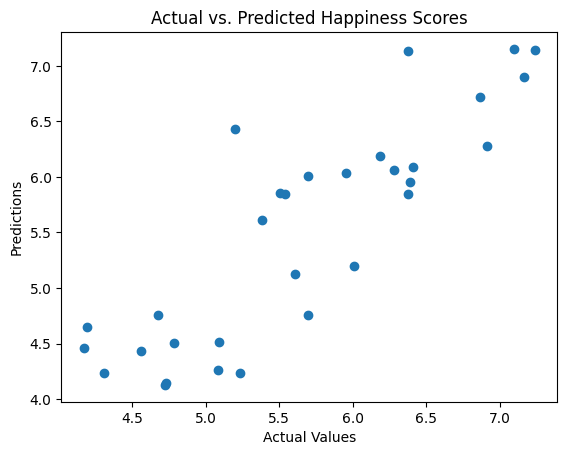

In [ ]:
# Evaluate final model
best_model = grid_search.best_estimator_
final_preds = best_model.predict(X_test[selected_features])
final_mse = mean_squared_error(y_test, final_preds)
final_r2 = r2_score(y_test, final_preds)

print(f'Final Model MSE: {final_mse}')
print(f'Final Model R-squared: {final_r2}')

# Visualize predictions vs. actual
plt.scatter(y_test, final_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predicted Happiness Scores')
plt.show()
